# Demo phương pháp Degree Centrality với Spark

In [1]:
from graphframes.lib import AggregateMessages as AM
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark import SparkContext
from graphframes import *
import matplotlib.pyplot as plt
import networkx as nx
import findspark
import pandas as pd

findspark.init()

In [37]:
spark = SparkSession.builder.appName("Degree-Centrality").getOrCreate()
sc = spark.sparkContext

In [3]:
v = spark.read.csv("./data/social-nodes.csv", header=True)
e = spark.read.csv("./data/social-relationships.csv", header=True)
g = GraphFrame(v, e)

In [4]:
total_degree = g.degrees
in_degree = g.inDegrees
out_degree = g.outDegrees

In [5]:
total_degree.join(in_degree, "id", how="left")\
    .join(out_degree, "id", how="left")\
    .fillna(0)\
    .sort("inDegree", ascending=False)\
    .show()

+-------+------+--------+---------+
|     id|degree|inDegree|outDegree|
+-------+------+--------+---------+
|   Doug|     6|       5|        1|
|  Alice|     7|       3|        4|
|Michael|     5|       2|        3|
|Bridget|     5|       2|        3|
|    Amy|     1|       1|        0|
|  David|     2|       1|        1|
|Charles|     2|       1|        1|
|   Mark|     3|       1|        2|
|  James|     1|       0|        1|
+-------+------+--------+---------+



In [35]:
def plotGraph(edges):
    plt.figure(figsize=(12, 8))
    G_symmetric = nx.DiGraph()
    for row in edges.collect():
        G_symmetric.add_edge(row['src'], row['dst'])
    nx.degree_centrality(G_symmetric)
    pos = nx.circular_layout(G_symmetric)
    betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
    node_color = [G_symmetric.degree(v) for v in G_symmetric]
    node_size =  [v * 10000 for v in betCent.values()]
    plt.figure(figsize=(10,10))
    nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                    node_color=node_color,
                    node_size=node_size)

<Figure size 864x576 with 0 Axes>

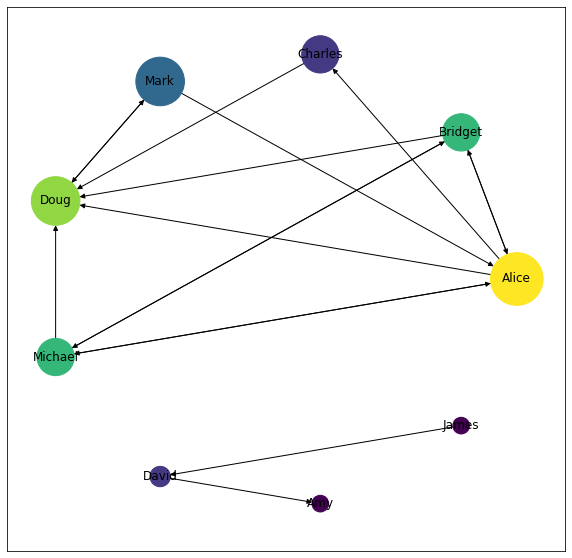

In [36]:
plotGraph(e)